# Non Graded Challenge 1 Phase 1
- Muhammad Fadlil Ismail
- FTDS Batch 10

## Import Library

In [1]:
!pip install feature_engine

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from feature_engine.outliers import Winsorizer


## Load Data

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Exploratory Data Analysis

In [7]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.stroke.unique()

array([1, 0], dtype=int64)

In [9]:
for i in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    print(i)
    print(df[i].value_counts())
    print('*'*50)

gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
**************************************************
ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
**************************************************
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
**************************************************
Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
**************************************************
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
**************************************************


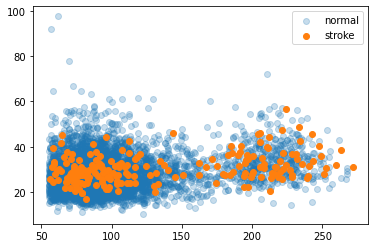

In [10]:
plt.scatter(x=df.avg_glucose_level[df.stroke==0], y=df.bmi[df.stroke==0], alpha=0.25, label='normal')
plt.scatter(x=df.avg_glucose_level[df.stroke==1], y=df.bmi[df.stroke==1], alpha=1, label='stroke')
plt.legend()
plt.show()

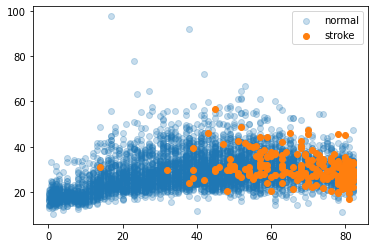

In [11]:
plt.scatter(x=df.age[df.stroke==0], y=df.bmi[df.stroke==0], alpha=0.25, label='normal')
plt.scatter(x=df.age[df.stroke==1], y=df.bmi[df.stroke==1], alpha=1, label='stroke')
plt.legend()
plt.show()

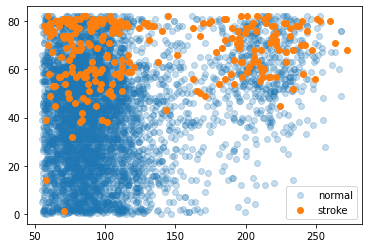

In [12]:
plt.scatter(x=df.avg_glucose_level[df.stroke==0], y=df.age[df.stroke==0], alpha=0.25, label='normal')
plt.scatter(x=df.avg_glucose_level[df.stroke==1], y=df.age[df.stroke==1], alpha=1, label='stroke')
plt.legend()
plt.show()

## Data Preprocessing

### Feature-Target Splitting

In [13]:
X = df.drop('stroke', axis=1)
y = df[['stroke']]
print(X.shape)
print(y.shape)

(5110, 11)
(5110, 1)


### Train-Test Splitting

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=69, stratify=y)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4088, 11)
(1022, 11)
(4088, 1)
(1022, 1)


### Outlier

#### Cek outlier tiap-tiap kolom

In [15]:
#Cek distribusi dan skewness
num_col = ['age', 'avg_glucose_level', 'bmi']

for i in num_col:
    print(f'Kolom : {i}')
    print(f'Skewness : {X_train[i].skew()}')
    print('*'*50)

Kolom : age
Skewness : -0.14218393569225599
**************************************************
Kolom : avg_glucose_level
Skewness : 1.5510367785934716
**************************************************
Kolom : bmi
Skewness : 1.0020677820011734
**************************************************


- Kolom tedistribusi normal : 'age'
- Kolom skewed : 'avg_glucose_level', 'bmi'

In [16]:
#Handling kolom avg_glucose_level
num = 3
q11 = np.quantile(X_train.avg_glucose_level, 0.25)
q31 = np.quantile(X_train.avg_glucose_level, 0.75)
iqr1 = q31 - q11
upper1 = q31 + num*iqr1
lower1 = q11 - num*iqr1

print(upper1)
print(lower1)
print(f'Persen outlier: {len(X_train[(X_train.avg_glucose_level>upper1)|(X_train.avg_glucose_level<lower1)])*100/4088}')
outlier1 = X_train[(X_train.avg_glucose_level>upper1)|(X_train.avg_glucose_level<lower1)]
outlier1

227.62
-35.63250000000001
Persen outlier: 2.8131115459882583


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
14,37526,Female,68.0,1,1,Yes,Private,Rural,233.30,NaN,Unknown
34,72337,Female,55.0,0,0,Yes,Private,Urban,231.76,42.9,never smoked
89,2982,Female,57.0,1,0,Yes,Private,Rural,235.85,40.1,never smoked
294,27566,Male,65.0,0,0,Yes,Private,Rural,236.14,43.1,Unknown
297,27803,Female,54.0,0,0,Yes,Govt_job,Urban,231.54,29.9,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
3919,21534,Male,67.0,0,0,Yes,Private,Urban,260.85,NaN,Unknown
3983,63732,Male,70.0,1,0,Yes,Self-employed,Urban,251.60,27.1,never smoked
4010,42323,Male,59.0,0,0,Yes,Govt_job,Rural,231.95,33.2,never smoked
4038,25627,Male,81.0,1,0,Yes,Self-employed,Urban,231.19,31.6,formerly smoked


Jumlah outlier pada kolom 'avg_glucose_level' adalah 3.13%. Metode handling : trimming

In [17]:
#Handling kolom bmi
num=3
q12 = np.nanquantile(X_train.bmi, 0.25)
q32 = np.nanquantile(X_train.bmi, 0.75)
iqr2 = q32 - q12
upper2 = q32 + num*iqr2
lower2 = q12 - num*iqr2

print(q12)
print(q32)
print(upper2)
print(lower2)
print(f'Persen outlier: {len(X_train[(X_train.bmi>upper2)|(X_train.bmi<lower2)])*100/4088}')
outlier2 = X_train[(X_train.bmi>upper2)|(X_train.bmi<lower2)]
outlier2

23.6
33.1
61.6
-4.899999999999999
Persen outlier: 0.14677103718199608


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
671,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked
1016,20292,Female,24.0,0,0,Yes,Private,Urban,85.55,63.3,never smoked
1359,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown
3193,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes
3719,70670,Female,27.0,0,0,Yes,Private,Rural,57.96,64.4,never smoked
3924,66333,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked


Jumlah outlier pada kolom 'bmi' : 0.19%. Metode handling : trimming

In [18]:
#Handling Kolom Age
std = X_train.age.std()
upper3 = X_train.age.mean() + 3*std
lower3 = X_train.age.mean() - 3*std
print(upper3)
print(lower3)
X_train[X_train.age>upper3]

110.73853148071355
-24.340723261535416


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status


Tidak terdapat outlier pada kolom 'age'.

#### Handling outlier

In [19]:
X_train_no_outliers = X_train[~(X_train.bmi>upper2) & ~(X_train.bmi<lower2) & ~(X_train.avg_glucose_level>upper1) & ~(X_train.avg_glucose_level<lower1)]
X_train_no_outliers

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,65766,Female,27.0,0,0,No,Private,Rural,104.33,20.1,never smoked
1,23851,Female,57.0,0,0,No,Private,Rural,87.18,20.0,formerly smoked
2,31164,Female,43.0,0,0,Yes,Private,Rural,95.93,21.8,Unknown
3,71917,Male,12.0,0,0,No,children,Rural,213.87,25.3,never smoked
4,40253,Male,27.0,0,0,No,Private,Rural,191.79,NaN,smokes
...,...,...,...,...,...,...,...,...,...,...,...
4083,3253,Male,61.0,0,1,Yes,Private,Rural,111.81,27.3,smokes
4084,51254,Female,65.0,0,0,No,Private,Urban,74.50,32.0,never smoked
4085,25102,Female,51.0,0,0,Yes,Govt_job,Urban,95.16,42.7,formerly smoked
4086,63420,Male,64.0,1,0,Yes,Private,Urban,81.68,31.3,formerly smoked


In [20]:
y_train_no_outliers = y_train[y_train.index.isin(X_train_no_outliers.index)]
y_train_no_outliers

,stroke
0,0
1,0
2,0
3,0
4,0
...,...
4083,1
4084,0
4085,0
4086,0


In [21]:
X_train_no_outliers.reset_index(inplace=True, drop=True)
y_train_no_outliers.reset_index(inplace=True, drop=True)

### Missing Value

Misiing value terdapat pada kolom 'bmi' yang tidak terdistribusi normal

In [22]:
med = np.nanmedian(X_train_no_outliers['bmi'])
X_train_no_outliers['bmi'].fillna(med, inplace=True)


C:\Users\Muhammad Fadlil\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [23]:
X_train_no_outliers.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

### Feature Selection

#### Data kategorikal
Digunakan chi square test untuk menentukan hubungan antara tiap-tiap kolom kategorikal dengan kolom stroke

In [24]:
cat_col = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
p_lst = []
for i in cat_col:
    print(f'Kolom: {i}')
    xtab = pd.crosstab(X_train_no_outliers[i], y_train_no_outliers['stroke'])
    print(xtab)
    g, p, dof, expctd = chi2_contingency(xtab)
    p_lst.append(p)
    print(p)
    print('*'*50)

Kolom: gender
stroke     0    1
gender           
Female  2226  105
Male    1557   78
Other      1    0
0.9034556057175188
**************************************************
Kolom: hypertension
stroke           0    1
hypertension           
0             3474  135
1              310   48
2.7257629674084445e-16
**************************************************
Kolom: heart_disease
stroke            0    1
heart_disease           
0              3619  151
1               165   32
5.781685053055743e-15
**************************************************
Kolom: ever_married
stroke           0    1
ever_married           
No            1372   25
Yes           2412  158
6.775531509393855e-10
**************************************************
Kolom: work_type
stroke            0    1
work_type               
Govt_job        482   26
Never_worked     18    0
Private        2162  106
Self-employed   582   49
children        540    2
1.3416821903326064e-07
**************************************

In [25]:
pd.DataFrame({'Kolom':cat_col, 'P_val':p_lst})

,Kolom,P_val
0,gender,9.034556e-01
1,hypertension,2.725763e-16
2,heart_disease,5.781685e-15
3,ever_married,6.775532e-10
4,work_type,1.341682e-07
5,Residence_type,2.762182e-01
6,smoking_status,4.521034e-04


Kolom 'gender' dan 'Residence_type' tidak berhubungan dengan kolom 'Stroke' karena nilai p_value-nya di atas 0.05

#### Data Numerik

Digunakan Two Sample Two Tailed T-Test untuk menentukan apakah rata-rata 'age', 'bmi' dan 'avg_glucose_level' antara pengidap stroke dan bukan berbeda secara signifikan.

In [26]:
X_y_train_no_outliers = X_train_no_outliers.copy()
X_y_train_no_outliers['stroke'] = y_train_no_outliers['stroke']

num_col = ['age', 'bmi', 'avg_glucose_level']
p_lst2 = []
for i in num_col:
    is_stroke = X_y_train_no_outliers[X_y_train_no_outliers.stroke==1][i]
    not_stroke = X_y_train_no_outliers[X_y_train_no_outliers.stroke==0][i]
    tstat, pval = ttest_ind(is_stroke, not_stroke)
    p_lst2.append(pval)


In [27]:
pd.DataFrame({'Kolom':num_col, 'P_value':p_lst2})

,Kolom,P_value
0,age,4.766393e-53
1,bmi,3.881955e-02
2,avg_glucose_level,5.522275e-12


Kolom yang memiliki korelasi dengan stroke : 'age', 'avg_glucose_level'.

Kolom yang tidak berkolerasi : 'bmi'

Kolom di drop : 'gender', 'Residence_type', 'bmi', 'id'.

In [28]:
X_train_final = X_train_no_outliers.drop(['gender', 'Residence_type', 'bmi', 'id', 'ever_married', 'work_type'], axis=1)
X_test_final = X_test.drop(['gender', 'Residence_type', 'bmi', 'id', 'ever_married', 'work_type'], axis=1)

In [29]:
X_train_final

,age,hypertension,heart_disease,avg_glucose_level,smoking_status
0,27.0,0,0,104.33,never smoked
1,57.0,0,0,87.18,formerly smoked
2,43.0,0,0,95.93,Unknown
3,12.0,0,0,213.87,never smoked
4,27.0,0,0,191.79,smokes
...,...,...,...,...,...
3962,61.0,0,1,111.81,smokes
3963,65.0,0,0,74.50,never smoked
3964,51.0,0,0,95.16,formerly smoked
3965,64.0,1,0,81.68,formerly smoked


In [30]:
X_test_final

,age,hypertension,heart_disease,avg_glucose_level,smoking_status
0,14.0,0,0,118.81,Unknown
1,27.0,0,0,72.61,never smoked
2,61.0,0,0,69.15,formerly smoked
3,1.0,0,0,84.85,Unknown
4,73.0,0,0,208.69,Unknown
...,...,...,...,...,...
1017,10.0,0,0,112.34,Unknown
1018,9.0,0,0,110.97,Unknown
1019,30.0,0,0,112.19,never smoked
1020,71.0,0,0,100.61,Unknown


### Feature Scaling

Akan dilakukan scaling pada kolom avg_glucose_level menggunakan minmax scaler karena data pada kolom tersebut tidak terdistribusi normal

In [31]:
# Split numerik dan kategorikal
num_col = ['age', 'avg_glucose_level']
cat_col_fix = ['hypertension', 'heart_disease']
cat_col = ['smoking_status']

X_train_num = X_train_final[num_col]
X_test_num = X_test_final[num_col]

X_train_cat = X_train_final[cat_col]
X_test_cat = X_test_final[cat_col]

X_train_cat_fix = X_train_final[cat_col_fix]
X_test_cat_fix = X_test_final[cat_col_fix]

In [32]:
scaler = MinMaxScaler()
X_train_num = scaler.fit_transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

In [33]:
X_train_num = pd.DataFrame(X_train_num)
X_train_num.columns = ['age', 'avg_glucose_level']
X_train_num

,age,avg_glucose_level
0,0.328613,0.285043
1,0.694824,0.185501
2,0.523926,0.236288
3,0.145508,0.920831
4,0.328613,0.792675
...,...,...
3962,0.743652,0.328458
3963,0.792480,0.111904
3964,0.621582,0.231818
3965,0.780273,0.153578


In [34]:
X_test_num = pd.DataFrame(X_test_num)
X_test_num.columns = ['age', 'avg_glucose_level']
X_test_num

,age,avg_glucose_level
0,0.169922,0.369087
1,0.328613,0.100934
2,0.743652,0.080852
3,0.011230,0.171977
4,0.890137,0.890766
...,...,...
1017,0.121094,0.331534
1018,0.108887,0.323582
1019,0.365234,0.330663
1020,0.865723,0.263451


### Feature Encoding

Encoding untuk kolom 'work_type' dan kolom 'smoking_status'

In [35]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train_cat)
X_train_cat = encoder.transform(X_train_cat)
X_test_cat = encoder.transform(X_test_cat)


In [36]:
X_train_cat = pd.DataFrame(X_train_cat)
X_test_cat = pd.DataFrame(X_test_cat)

In [37]:
X_train_cat.columns = encoder.get_feature_names()
X_test_cat.columns = encoder.get_feature_names()

In [38]:
X_train_final = X_train_num.join(X_train_cat).join(X_train_cat_fix)
X_train_final

,age,avg_glucose_level,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,hypertension,heart_disease
0,0.328613,0.285043,0.0,0.0,1.0,0.0,0,0
1,0.694824,0.185501,0.0,1.0,0.0,0.0,0,0
2,0.523926,0.236288,1.0,0.0,0.0,0.0,0,0
3,0.145508,0.920831,0.0,0.0,1.0,0.0,0,0
4,0.328613,0.792675,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...
3962,0.743652,0.328458,0.0,0.0,0.0,1.0,0,1
3963,0.792480,0.111904,0.0,0.0,1.0,0.0,0,0
3964,0.621582,0.231818,0.0,1.0,0.0,0.0,0,0
3965,0.780273,0.153578,0.0,1.0,0.0,0.0,1,0


In [39]:
X_test_final = X_test_num.join(X_test_cat).join(X_test_cat_fix)
X_test_final

,age,avg_glucose_level,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,hypertension,heart_disease
0,0.169922,0.369087,1.0,0.0,0.0,0.0,0,0
1,0.328613,0.100934,0.0,0.0,1.0,0.0,0,0
2,0.743652,0.080852,0.0,1.0,0.0,0.0,0,0
3,0.011230,0.171977,1.0,0.0,0.0,0.0,0,0
4,0.890137,0.890766,1.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...
1017,0.121094,0.331534,1.0,0.0,0.0,0.0,0,0
1018,0.108887,0.323582,1.0,0.0,0.0,0.0,0,0
1019,0.365234,0.330663,0.0,0.0,1.0,0.0,0,0
1020,0.865723,0.263451,1.0,0.0,0.0,0.0,0,0


## Model Definition

In [70]:
model_svc = SVC(kernel='poly', degree=20)

## Model Training

In [71]:
model_svc.fit(X_train_final, y_train_no_outliers)

C:\Users\Muhammad Fadlil\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Model Evaluation

In [68]:
y_pred = model_svc.predict(X_test_final)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



C:\Users\Muhammad Fadlil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Muhammad Fadlil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Muhammad Fadlil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [63]:
print(tn,tp)

947 3


In [46]:
confusion_matrix(y_test, y_pred)

array([[972,   0],
       [ 50,   0]], dtype=int64)

In [47]:
recall = tp/(tp+fn)
print(recall)

0.0
